In [4]:
import re
import pandas as pd
import numpy as np
import dropbox
import json
from pprint import pprint
from StringIO import StringIO
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

In [2]:
# Set results filename here!
filename = "ann_model_selector_results_2016-07-04 04:13:01.191864.csv"

# Initialize the Dropbox client
client = dropbox.client.DropboxClient('qECz4Lio64gAAAAAAAADKCBiIafW0-teoaxb7jaNJVjcn517S7mH0l7rwjZXbThX')

# Download configuration file from Dropbox
print('Downloading results file...')
f, metadata = client.get_file_and_metadata('results/' + filename)
print('Results file downloaded!')
print

# Import data
data_url = StringIO(f.read())
data = pd.read_csv(data_url)
# pprint(raw_data)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: You are using a deprecated client. Please use the new v2 client located at dropbox.Dropbox.


Results file downloaded!



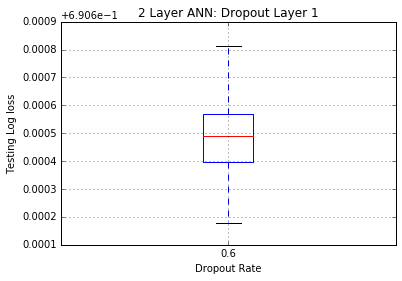

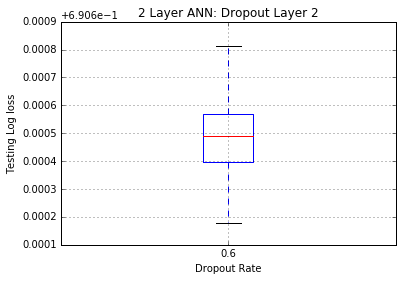

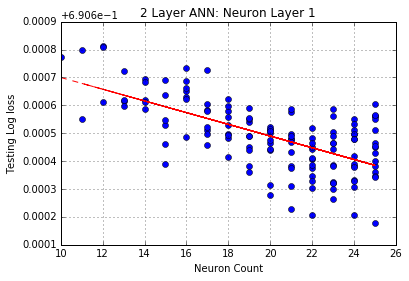

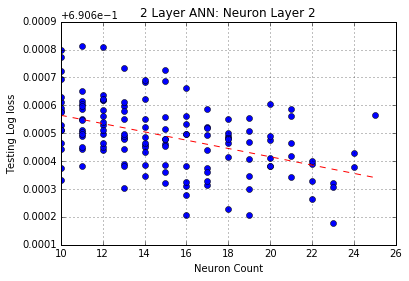

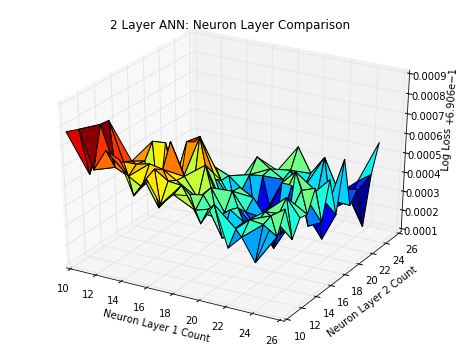

    dropout_rates num_neurons  testing_log_loss
132    [0.6, 0.6]    [25, 23]          0.690779
113    [0.6, 0.6]    [24, 19]          0.690806
87     [0.6, 0.6]    [22, 16]          0.690808
103    [0.6, 0.6]    [21, 18]          0.690829
127    [0.6, 0.6]    [23, 22]          0.690863
85     [0.6, 0.6]    [20, 16]          0.690879
112    [0.6, 0.6]    [23, 19]          0.690900
54     [0.6, 0.6]    [22, 13]          0.690904
131    [0.6, 0.6]    [24, 23]          0.690905
86     [0.6, 0.6]    [21, 16]          0.690909


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:70: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [28]:
layer_counts = np.sort(data['num_layers'].unique())
num_results = len(data)

# Prepare plots based on layer counts
m = 0
for i in layer_counts:
    layer_data = data[data['num_layers'] == i]
    
    # Plot dropout rates vs accuracies
    for j in xrange(i):
        x = np.ndarray(num_results)
        y = np.ndarray(num_results)
        
        # Extract the dropout rates pertaining to this layer
        for k in xrange(num_results):
            values = re.sub('[\[\] ]', '', layer_data['dropout_rates'][k]).split(',')
            x[k] = float(values[j])
            y[k] = data['testing_log_loss'][k]
        
        # Plot
        plt.figure(m)
        plt.title('%d Layer ANN: Dropout Layer %d' % (i, j+1))
        plt.ylabel('Testing Log loss')
        plt.xlabel('Dropout Rate')
        plt.grid(True)
        plt.boxplot(y, labels=np.unique(x))

        m += 1

    # Plot neuron counts vs accuracies
    neuron_data = np.ndarray((i, num_results, 2))
    for j in xrange(i):
        # Extract the neuron counts pertaining to this layer
        for k in xrange(num_results):
            values = re.sub('[\[\] ]', '', layer_data['num_neurons'][k]).split(',')
            neuron_data[j,k,0] = float(values[j])
            neuron_data[j,k,1] = data['testing_log_loss'][k]
    
        # Plot
        plt.figure(m)
        plt.title('%d Layer ANN: Neuron Layer %d' % (i, j+1))
        plt.ylabel('Testing Log loss')
        plt.xlabel('Neuron Count')
        plt.grid(True)
        plt.plot(neuron_data[j,:,0], neuron_data[j,:,1], "o")

        # Calculate the trendline
        z = np.polyfit(neuron_data[j,:,0], neuron_data[j,:,1], 1)
        p = np.poly1d(z)
        plt.plot(neuron_data[j,:,0], p(neuron_data[j,:,0]), "r--")

        m += 1

    # For multi hidden layer ANNs, compare neuron counts
    if(i == 2):
        # Plot
        fig = plt.figure(m, figsize=(8,6), dpi=80)
        ax = fig.gca(projection='3d')
        ax.set_title('2 Layer ANN: Neuron Layer Comparison')
        ax.set_xlabel('Neuron Layer 1 Count')
        ax.set_ylabel('Neuron Layer 2 Count')
        ax.set_zlabel('Log Loss')
        ax.plot_trisurf(neuron_data[0,:,0], neuron_data[1,:,0], neuron_data[0,:,1], cmap=cm.jet)
    
        m += 1

    plt.show()
    
    # Show top N results
    test = layer_data.sort(['testing_log_loss'])[:10][['dropout_rates', 'num_neurons', 'testing_log_loss']]
    pprint(test)